In [1]:
import pandas as pd
import numpy as np

In [18]:
# student.csv 파일읽어오기
# 이름을 인덱스로 사용
df = pd.read_csv('./data/student.csv', encoding='cp949', index_col = '이름')
df.head()

,국어,영어,수학
이름,,,
박지영,90,85,55
김태함,70,65,80
김효섭,92,95,76
임경희,76,89,88
권혁진,97,87,83


<Axes: xlabel='이름'>

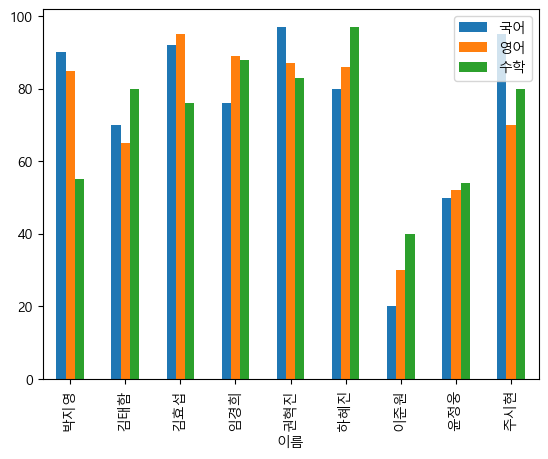

In [19]:
# 단순한 표준화 작업 만으로는 성적을 비교하기 어려울 수 있음
# 최대값이나 최대값-최소값으로 나눈 데이터로는 비교하기가 어려움
# 이런 경우에는 표준값이나 편차 값을 구해서 비교하는 것이 좋음
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform 

# 한글사용을 위한 걸정
if platform.system() == 'Darwin':
    rc('font', family ='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
#음수 사용을 위한 설정
plt.rcParams['axes.unicode_minus'] = False

df.plot(kind='bar')

In [25]:
# 평균값, 편차 구하기
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd  = df['영어'].mean(), df['영어'].std()
mathmean, mathstd = df['수학'].mean(), df['수학'].std()

#표준값 구하기
df['국어표준값'] = (df['국어']-kormean) / korstd
df['영어표준값'] = (df['영어']-engmean) / engstd
df['수학표준값'] = (df['수학']-mathmean) / mathstd

#편차값 구하기
df['국어편차값'] = df['국어표준값']* 10 + 50
df['영어편차값'] = df['영어표준값']* 10 + 50
df['수학편차값'] = df['수학표준값']* 10 + 50

df[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar')

<Axes: xlabel='이름'>

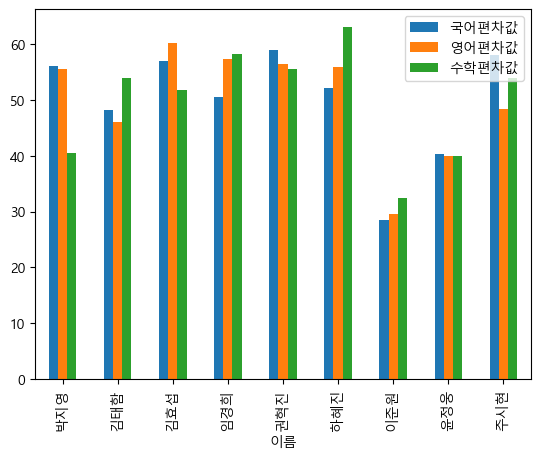

In [26]:
df[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar')

### 표준화

In [33]:
auto_mpg = pd.read_csv('./data/auto-mpg.csv', header= None)
auto_mpg.columns = ['mpg', 'cylinders','displacement', 'horsepower','weight',
                   'acceleration','model year','origin', 'name']

auto_mpg['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg.dropna(subset=['horsepower'], axis=0, inplace=True)
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype('float')
print(auto_mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [39]:
#horsepower 열의 표준화
auto_mpg['maxhorsepower'] = auto_mpg['horsepower']/auto_mpg['horsepower'].max()
auto_mpg['minmaxhorsepower'] = (auto_mpg['horsepower']- auto_mpg['horsepower'].min())/(auto_mpg['horsepower'].max()-auto_mpg['horsepower'].min())

auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorsepower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


In [46]:
from sklearn import preprocessing
# 스케일링을 수행할 데이터 가져오기

x = auto_mpg[['horsepower']].values
print(type(x))

print("평균:", np.mean(x))
print("표준편차:",np.std(x))
print("최대값:", np.max(x))
print("최솟값:", np.min(x))

scaler = preprocessing.StandardScaler()
# scaler.fit(x)

x_scaled = scaler.fit_transform(x)

print()
print("평균:", np.mean(x_scaled ))
print("표준편차:",np.std(x_scaled ))
print("최대값:", np.max(x_scaled ))
print("최솟값:", np.min(x_scaled ))

<class 'numpy.ndarray'>
평균: 104.46938775510205
표준편차: 38.44203271442593
최대값: 230.0
최솟값: 46.0

평균: -1.812609019796174e-16
표준편차: 0.9999999999999998
최대값: 3.2654519904664348
최솟값: -1.5209754434541274


### 정규화

In [48]:
features = np.array([[1,2], [2,3], [3,8], [4,2],[7,2]])

# 정규화 객체 - l2
# l1을 norm에 적용하면 맨하튼 거리 - 합치면 1
# l2를 적용하면 유클리드 거리 - 각 값을 전체 데이터를 제곱해서 더한 값의 제곱근으로 나누는 것
normalizer = preprocessing.Normalizer(norm="l2")
l2_norm = normalizer.transform(features)
print(l2_norm)

[[0.4472136  0.89442719]
 [0.5547002  0.83205029]
 [0.35112344 0.93632918]
 [0.89442719 0.4472136 ]
 [0.96152395 0.27472113]]


In [51]:
# 다항과 교차항 생성
features = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

# 제곱항까지의 다항을 생성 - 열의 개수가 늘어나게 되는데
# 회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우
# 또는 데이터가 부족할 때 샘플 데이터를 추가하기 위해서 사용
# 제곱을 하거나 곱하기를 하게 되면 데이터의 특성 자체는 크게 변화하지 않기 때문에 사용
polynomialer = preprocessing.PolynomialFeatures(degree=2, include_bias = False)
result = polynomialer.fit_transform(features)
print(result)

[[ 1.  2.  1.  2.  4.]
 [ 2.  3.  4.  6.  9.]
 [ 3.  8.  9. 24. 64.]
 [ 4.  2. 16.  8.  4.]
 [ 7.  2. 49. 14.  4.]]


In [54]:
features = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

# 위의 데이터에 함수 적용
result1 = preprocessing.FunctionTransformer( lambda x : x+1).transform(features)
print(result1)
print()

df = pd.DataFrame(features, columns=['feature1', 'feature2'])
print(df.apply(lambda x: x+1).values)

[[2 3]
 [3 4]
 [4 9]
 [5 3]
 [8 3]]

[[2 3]
 [3 4]
 [4 9]
 [5 3]
 [8 3]]


In [63]:
# 컬럼 별 다른 함수 적용
from sklearn.compose import ColumnTransformer

def add_one(x):
    return x + 1

def sub_one(x):
    return x - 1

# feature1에는 add_one, feature 2에는 sub_one 적용
result2 = ColumnTransformer([("add_one",preprocessing.FunctionTransformer(add_one, validate = True),
                                            ['feature1']),
                                           ("sub_one",preprocessing.FunctionTransformer(sub_one, validate = True),
                                            ['feature2'])]).fit_transform(df)
print(result2)

[[2 1]
 [3 2]
 [4 7]
 [5 1]
 [8 1]]


In [64]:
auto_mpg['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [65]:
# 경계값 찾기
count, bin_dividers = np.histogram(auto_mpg['horsepower'], bins=3)
print(count, bin_dividers)

bin_names = ['저출력', '보통출력','고출력']

auto_mpg ['hp_bin'] = pd.cut( x = auto_mpg['horsepower'],
                            bins = bin_dividers,
                            labels = bin_names,
                            include_lowest = True)
print(auto_mpg[['horsepower', 'hp_bin']].head(20))

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력
15        95.0    저출력
16        97.0    저출력
17        85.0    저출력
18        88.0    저출력
19        46.0    저출력


In [68]:
age = np.array([[13],[30],[67],[36],[20],[33],[20],[33],[27],[19]])

# 2개 그룹으로 분할
binarizer = preprocessing.Binarizer(threshold = 30.0)
result = binarizer.transform(age)
print(result)

# 여러 개의 그룹으로 분할
# 4개의 그룹으로 일련번호 형태로 일정한 비율로 분할
# strategy 에 uniform을 설정하면 간격을 일정하게 분할
# encode 가 ordinal이면 일련번호로 그룹 생성
# one hot을 설정하면 one hot encoding을 한 후 희소행렬로
# one hot dense 로 설정하면 one hot encoding을 한 후 밀집행렬로 리턴

kb = preprocessing.KBinsDiscretizer(4, encode='ordinal', strategy='uniform')
result = kb.fit_transform(age)
print(result)

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
[[0.]
 [1.]
 [3.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [69]:
# 군짐 분석을 이용한 구간 분할
from sklearn.cluster import KMeans
sample = np.array([[13,30], [30,40],[67,44],[26,24],[22,11],[98,28]])
df = pd.DataFrame(sample, columns = ['feature_1','feature_2'])
print(df)
# 3개의 군집으로 분할하는 객체 생성
cluster = KMeans(3, random_state = 42)

# sample 데이터를 이용해서 훈련
cluster.fit(sample)

# sample 데이터를 가지고 예측
df['group'] = cluster.predict(sample)

   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         26         24
4         22         11
5         98         28


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
# 이상치 감지
# z-score 를 이용해서 이상치를 판별해주는 함수
# 데이터가 12개보다 적으면 이상치가 없다고 판단

# z-score 보정
def outliers_z_score(ys):
    #표준편차 임계값
    threshold = 3.5
    mean_y = np.median(ys)
    print("평균: ", mean_y)
    
    stdev_y = np.std(ys)
    print("표준편차: ", stdev_y)

    z_scores = [0.6745 * (y-mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores)> threshold)

features = np.array([[10,10,7,6,3,1,2], [20000,3,23,12,11,2,1]])
print(outliers_z_score(features))

평균:  6.5
표준편차:  5148.988020743019
(array([], dtype=int64), array([], dtype=int64))


In [83]:
#IQR을 이용하는 방법

def outlier_iqr(ys):
    #1사분위수와 3사분위수 구하기
    quartile_1, quartile_3 = np.percentile(ys, [25,75])
    iqr = quartile_3 - quartile_1
    
    #일반적인 데이터의 하한과 상한 구하기
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iar * 1.5)
    return np.where((ys > upper_bound | (ys < lower_bound)))

# 일정 비율의 데이터를 이상치로 
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples=10, n_features=2, centers=1, random_state=42)
print(features)

#첫 번째 행의 데이터를 이상치로 수정
features[0,0] = 1000
features[0,1] = 1000

# 이상치 감지 객체 생성 - 이상치 비율 설정
outlier_detector = EllipticEnvelope(contamination = 0.1)
outlier_detector.fit(features)

# 이상치로 판정되면 -1로 리턴하고 그렇지 않으면 1을 리턴
# 첫번째 데이터만 -1로 리턴되고 나머지는 1
outlier_detector.predict(features)

[[-2.743351    8.78014917]
 [-3.4172217   7.60198243]
 [-3.52202874  9.32853346]
 [-2.26723535  7.10100588]
 [-2.97261532  8.54855637]
 [-1.04354885  8.78850983]
 [-1.86150908 10.53731598]
 [-2.97867201  9.55684617]
 [-4.23411546  8.4519986 ]
 [-0.92998481  9.78172086]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [86]:
# 이상치 처리
houses = pd.DataFrame()
houses['Price'] = [500000, 390000, 290000, 5000000]
houses['Rooms'] = [2,3,4,116]
houses['Feet'] = [1500, 2000, 1300, 2000]

# Rooms 값이 20보다 트면 이상치로 간주하고 특성을 추가
houses['Outlier'] = np.where(houses['Rooms']>20, 1, 0)
print(houses)

# Outlier의 영향을 최소화 - 특성 변환 (로그 변환)
houses['Log_Feet'] = [np.log(x) for x in houses['Feet']]
print(houses)

# Outlier의 영향을 최소화 - 특성 변환 (Scaling)
imsi = pd.DataFrame (houses['Rooms'])
scaler = preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scale_Rooms'] = scaler.transform(imsi)
print(houses)

     Price  Rooms  Feet  Outlier
0   500000      2  1500        0
1   390000      3  2000        0
2   290000      4  1300        0
3  5000000    116  2000        1
     Price  Rooms  Feet  Outlier  Log_Feet
0   500000      2  1500        0  7.313220
1   390000      3  2000        0  7.600902
2   290000      4  1300        0  7.170120
3  5000000    116  2000        1  7.600902
     Price  Rooms  Feet  Outlier  Log_Feet  Scale_Rooms
0   500000      2  1500        0  7.313220    -0.051282
1   390000      3  2000        0  7.600902    -0.017094
2   290000      4  1300        0  7.170120     0.017094
3  5000000    116  2000        1  7.600902     3.846154


In [95]:
# 결측치 확인
import seaborn as sns
titanic = sns.load_dataset('titanic')


#결측치가 200개 이상인 컬럼 제거
titanic_thresh = titanic.dropna(axis = 1, thresh=200)

# 결측치인 행만 제거
# result_age = titanic.dropna(subset['age'], how='any', axis =0)
# result_age.info()

In [99]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

# None을 포함하고 있는 값을 출력
print(titanic['embark_town'][825:831])

# embark_town 컬럼의 특성이 계절성을 갖는 다면 이 경우는 앞의 값을 채우는 것도 좋은 방법
result = titanic['embark_town'].fillna(method='ffill')
print(titanic['embark_town'][825:831])

# 결측치가 몇 개 되지 않을 때는 대푯값으로 대체
# 대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등
# 대표값으로 변환하는 경우, 많은 양의 데이터를 변경하면 분석할 때 결과가 왜곡될 수 있음
mode = titanic['embark_town'].value_counts()

# 가장 많이 출현한 데이터
print(mode.idxmax())

titanic['embark_town'].fillna(mode.idxmax(), inplace = True)
print(titanic['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
Southampton
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object


In [ ]:
# sklearn 의 Simplelmputer 이용
# 객체를 만들 때 strategy 옵션에 mean, median, most_frequent, constant 설정
# constat를 나중에 설정하면 fill_value 옵션에 채울 값 추가 해주어야 함

from sklearn.impote import Simplelmputer

simple_imputer = Simplelmputer(strategy = 'median')
print(simpke_imputer.fit_trnasform(features))

In [108]:
# from sklearn.impute import Simplelmputer

from fancyimpute import KNN
feautures = np.array([[100,200],[200,400],[300,600],[400,800],[200,np.nan]])
print(KNN(k=5, verbose=0).fit_transform(features))

[[ 1.00000000e+03  1.00000000e+03]
 [-3.41722170e+00  7.60198243e+00]
 [-3.52202874e+00  9.32853346e+00]
 [-2.26723535e+00  7.10100588e+00]
 [-2.97261532e+00  8.54855637e+00]
 [-1.04354885e+00  8.78850983e+00]
 [-1.86150908e+00  1.05373160e+01]
 [-2.97867201e+00  9.55684617e+00]
 [-4.23411546e+00  8.45199860e+00]
 [-9.29984808e-01  9.78172086e+00]]


C:\Users\USER\anaconda3\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
